In [25]:
import numpy as np
import pandas as pd

n = 1000

X_1 = np.random.uniform(0, 1, n)
X_2 = np.random.uniform(0, 1, n)
X_3 = np.random.uniform(0, 1, n)
X_4 = np.random.uniform(0, 1, n)
X_5 = np.random.uniform(0, 1, n)
X_6 = np.random.uniform(0, 1, n)
X_7 = np.random.uniform(0, 1, n)
X_8 = np.random.uniform(0, 1, n)
X_9 = np.random.uniform(0, 1, n)
X_10 = np.random.uniform(0, 1, n)

y = (X_1**2 + np.sin(X_2) - np.exp(X_3) + np.log1p(X_4) + 
     X_5*X_6 + X_7*X_8*X_9 - np.sqrt(X_10) + 
     X_1*X_2 - X_3*X_4 + X_5*X_6*X_7 +
     np.random.normal(0, 0.1, n))

df = pd.DataFrame({'X_1': X_1, 'X_2': X_2, 'X_3': X_3, 'X_4': X_4, 'X_5': X_5, 'X_6': X_6, 'X_7': X_7, 'X_8': X_8, 'X_9': X_9, 'X_10': X_10, 'y': y})

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets


In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
gbm.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_gbm = gbm.predict(X_test)

from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score, mean_absolute_error

r2_rf = r2_score(y_test, y_pred_rf)
r2_gbm = r2_score(y_test, y_pred_gbm)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)

rmse_rf = np.sqrt(mse_rf)
rmse_gbm = np.sqrt(mse_gbm)

results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'MSE': [mse_rf, mse_gbm],
    'RMSE': [rmse_rf, rmse_gbm],
    'MAE': [mae_rf, mae_gbm],
    'R2': [r2_rf, r2_gbm]
})




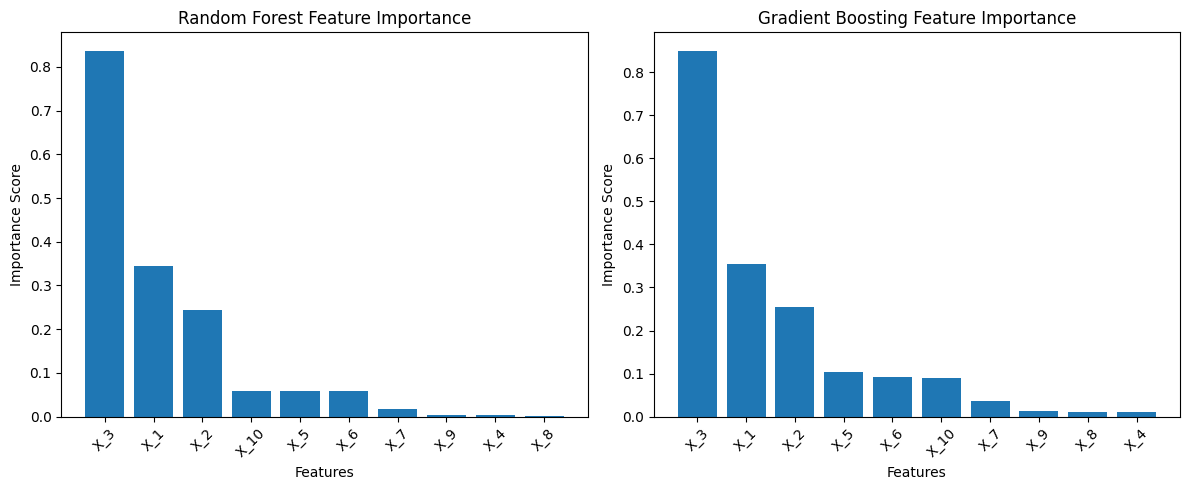

In [28]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate feature importance using permutation importance
result_rf = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
result_gbm = permutation_importance(gbm, X_test, y_test, n_repeats=10, random_state=42)

# Get importance scores
importance_rf = pd.DataFrame(
    {'feature': X.columns,
     'importance': result_rf.importances_mean}
).sort_values('importance', ascending=False)

importance_gbm = pd.DataFrame(
    {'feature': X.columns,
     'importance': result_gbm.importances_mean}
).sort_values('importance', ascending=False)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Random Forest importance
ax1.bar(importance_rf['feature'], importance_rf['importance'])
ax1.set_title('Random Forest Feature Importance')
ax1.set_xlabel('Features')
ax1.set_ylabel('Importance Score')
ax1.tick_params(axis='x', rotation=45)

# Plot Gradient Boosting importance
ax2.bar(importance_gbm['feature'], importance_gbm['importance'])
ax2.set_title('Gradient Boosting Feature Importance')
ax2.set_xlabel('Features')
ax2.set_ylabel('Importance Score')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_16487/2665427487.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


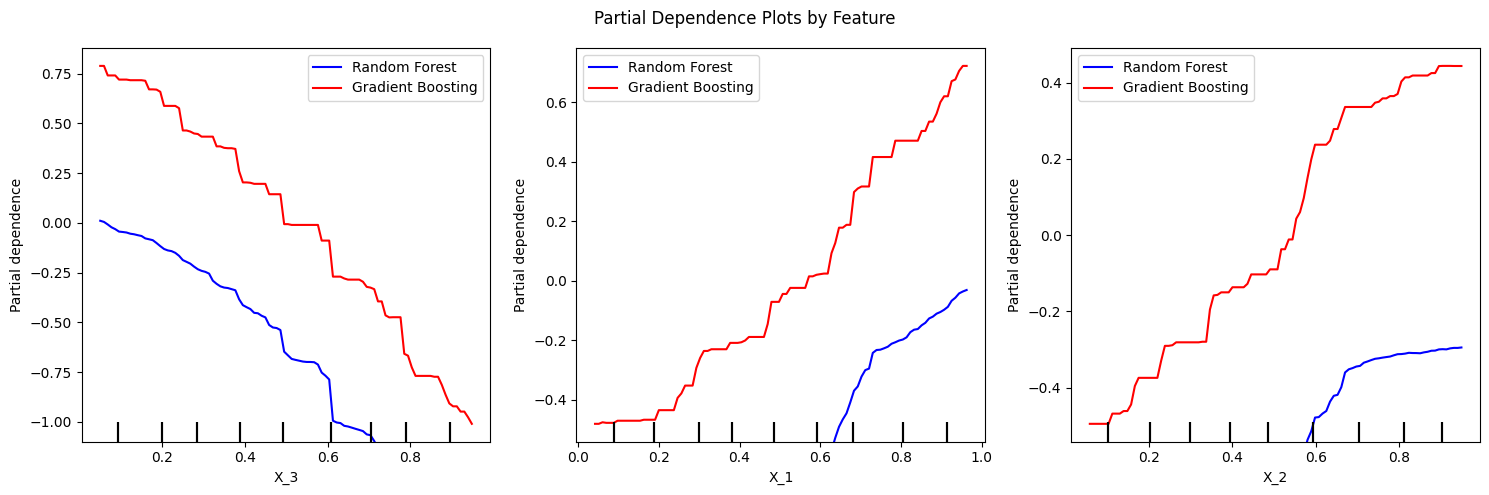

In [29]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Create subplots for each feature
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
features = ['X_3', 'X_1', 'X_2']
axes = [ax1, ax2, ax3]

# Plot PDPs for both models
for feature, ax in zip(features, axes):
    # Plot for Random Forest
    display_rf = PartialDependenceDisplay.from_estimator(
        rf,
        X_train,
        [feature],
        ax=ax,
        line_kw={'color': 'blue', 'label': 'Random Forest'},
        grid_resolution=100,
        random_state=42
    )
    
    # Plot for Gradient Boosting on the same axis
    display_gbm = PartialDependenceDisplay.from_estimator(
        gbm,
        X_train,
        [feature],
        ax=display_rf.axes_,
        line_kw={'color': 'red', 'label': 'Gradient Boosting'},
        grid_resolution=100,
        random_state=42
    )
    
    ax.grid(True)
    ax.legend()

plt.suptitle('Partial Dependence Plots by Feature')
plt.tight_layout()
plt.show()
